<h2>
PROJECT-3  AVACADO DATASET PROJECT
</h2>

<font color='green'>Problem Statement:-    
We have avacado dataset which has features like date,total volume,4046,4225,4770,total bags,large bags, xlarge bags,type,year
region. By using this feaatures i will predict the average price in this project. As average price is a numerical value and
continuous in nature so i will use regression method to predict the average price. The prediction includes many procedures like
EDA,Data Preprocessing, Feauture engineering, Model selection by using different algorithm etc. I will use certain libraries to
reach my goal and good accuracy score.
</font>


In [1]:
#Importing Library
import pandas as pd

In [2]:
#Data Load:- converting avacado csv file into dataframe called df
df= pd.read_csv("avacado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


<h3>
Exploratory Data Analysis
</h3>

In [3]:
#Checking the shape of dataframe to know that how many rows and how many columns are in the dataframe df.
df.shape

(16468, 14)

As i can see that there are 16468 rows and 14 columns are present in the data set.

In [4]:
# This will print the names of all columns.
df.columns  

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
# This will give Index, Datatype and Memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


From above observation we can see that there is 1517 value is not null and as we have seen before in  df.shape there is 
16468 rows so it means we have large missing values present in the dataset.

In [6]:
#To show the total count of missing values present in each column in the dataset

df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

As we can see that there are 14951 missing value in across all columns present in the dataset.

In [7]:
# As we have large missing values so instead of fill those values by using mean,mode and median i will delete all rows contain
# missing value as the missing values are same in all columns.
df.dropna(how = 'all',inplace=True)

In [8]:
#Agan checking the missing values count
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Now we can see that te missing values are drop from dataset and counts are 0  across all columns.

In [9]:
#This will give the random rows from dataset 
df.sample()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1322,50.0,10-01-2016,1.17,780979.13,60261.38,511067.0,26791.33,182859.42,180460.98,2398.44,0.0,conventional,2016.0,BaltimoreWashington


In [10]:
#Checking shape of the dataset after droping missing values
df.shape

(1517, 14)

In [11]:
#This will give the datanames of all columns
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

From above observation we can see that there 3 columns datatypes is object and rest are float so we have to convert object
into int or float for model building.

As per above observation we have seen that the date is object type so we have to change it into date type so we caan use this
in model building.


In [12]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [13]:
#Now checking the converted dataset now
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12,27
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12,20
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12,13
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6,12
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11,29


In [14]:
#As we see that year column datatype is flot so converting in into int datatype to perform good observaation
df['year'] = df['year'].astype(int)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [15]:
#Also after observing dataset i found that Unnamed column is just index and this is no required so better will drop this column

df.drop('Unnamed: 0',axis=1,inplace=True)
df.sample()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
583,2015-12-04,1.0,692569.85,525432.6,63130.09,59.84,103947.32,47627.94,56319.38,0.0,conventional,2015,MiamiFtLauderdale,12,4


In [16]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


In [17]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000
mean,1.07499,1601879.06784,646438.65411,611437.50259,50405.49540,293597.41574,248773.59529,42642.04937,2181.77107,2015.16282,6.36256,15.25379
std,0.18889,4433142.82075,1947613.56974,1672906.16466,137781.24924,757976.53132,647476.52050,118215.68184,7455.71214,0.36932,3.47215,8.96590
min,0.49000,38750.74000,467.72000,1783.77000,0.00000,3311.77000,3311.77000,0.00000,0.00000,2015.00000,1.00000,1.00000
25%,0.98000,147469.99000,20400.34000,41476.06000,911.25000,36206.89000,29727.22000,540.74000,0.00000,2015.00000,3.00000,7.00000
50%,1.08000,402791.86000,81751.17000,118664.89000,7688.17000,73979.06000,62375.69000,5044.35000,0.00000,2015.00000,6.00000,15.00000
75%,1.19000,981975.08000,377578.48000,485150.34000,29167.30000,157609.68000,146199.35000,29267.67000,401.48000,2015.00000,9.00000,22.00000
max,1.68000,44655461.51000,18933038.04000,18956479.74000,1381516.11000,6736304.04000,5893641.72000,1121076.47000,108072.79000,2016.00000,12.00000,31.00000


<font color='blue'>
From above plotting we are determining mean,SD,minimum and maxm value of each column in the dataset, Which helps us
in data cleaning.

Shape Of date: -
Rows= 1517
columns = 14
    
Key Observation:-

1. There are no missing value present in the dataset as the count is same across all columns present in the dataset,Count=1517

2. The standard deviation is very high in columns Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,Xlarge Bags, It
   means that the range is very high in these columns and and outliers are present.
   
3. The mean is high than medium in above mentioned columns so skewnwss is present in these coulumns and the skewnees is            positive means data is right skewed.

4. Difference between 75 percentile and maximum is very high in above mentioned columns. So by this observtion i caan say that
   there is outliers is present in our dataset.
    
</font>

In [18]:
#importing Some library to visualize the dataset and finding some observation
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [19]:
#converting object variable into numeric to per

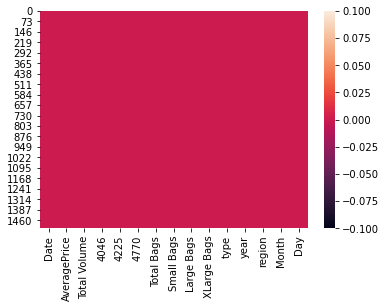

In [20]:
#Checking missing value using ploting heatmap
sns.heatmap(df.isnull())

As we can confirm that there is no missing value present in the dataset by ploting above heatmap

In [21]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int32
region                  object
Month                    int64
Day                      int64
dtype: object

In [22]:
#Converting object varible into numerical to see the corelation and finding better understanding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])
#I have not transform type into label as there is one type conventional across the dataset and which will n ot impact and less useful


In [23]:
df.sample()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
1012,2015-01-25,1.06,311348.31,187805.04,46947.97,12431.59,64163.71,45690.04,18473.67,0.0,conventional,2015,41,1,25


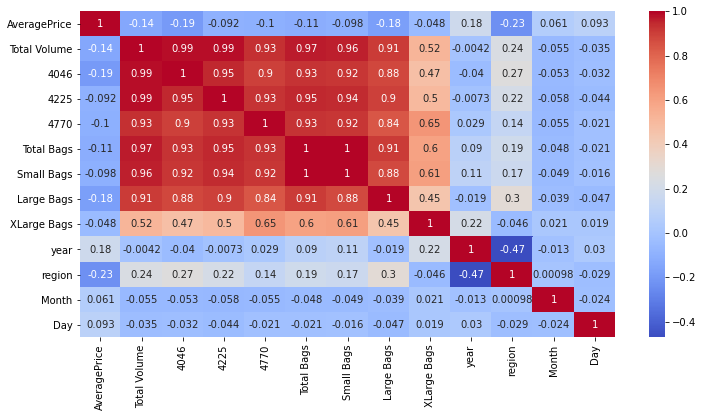

In [24]:
#Checking How data features are corelated with each other:-
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

Key Observation:-

1. I am taking AveragePrice as target variable and will check corelation of all columns with the target variable.

2. After obsrvation we can see that there is no any coulmn is good related with target variable however all are good corelated
   with each other so i found that as there is no columns good related with our target variable so may be it will impact on our
   model building.
   
3. There is 3 columns are positively corelated with target data :- Year,Month and Day.

4. Rest all columns are negatively behaving with target variable.

5. Highest +ve corelated column with target variable:- region

5. Highest -ve corelated column with target variable :- 4046


In [25]:
df['type'].unique()

array(['conventional'], dtype=object)

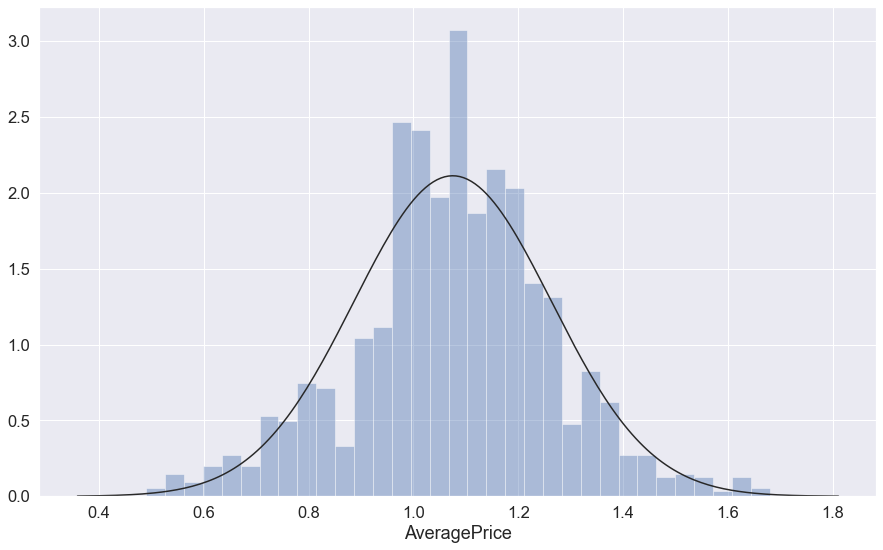

In [26]:
#Checking how average price distributed, What is the range where average price lies
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

From above observation i can see that average price is lies between 0.5 to 1.7

In [27]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'Day'],
      dtype='object')

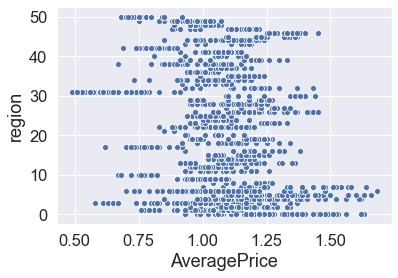

In [28]:
#Checking average price distribution along region
sns.scatterplot(x="AveragePrice",y="region",data=df)

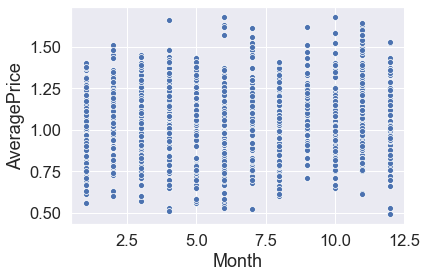

In [29]:
#Checking average price distribution along month
sns.scatterplot(x="Month",y="AveragePrice",data=df)

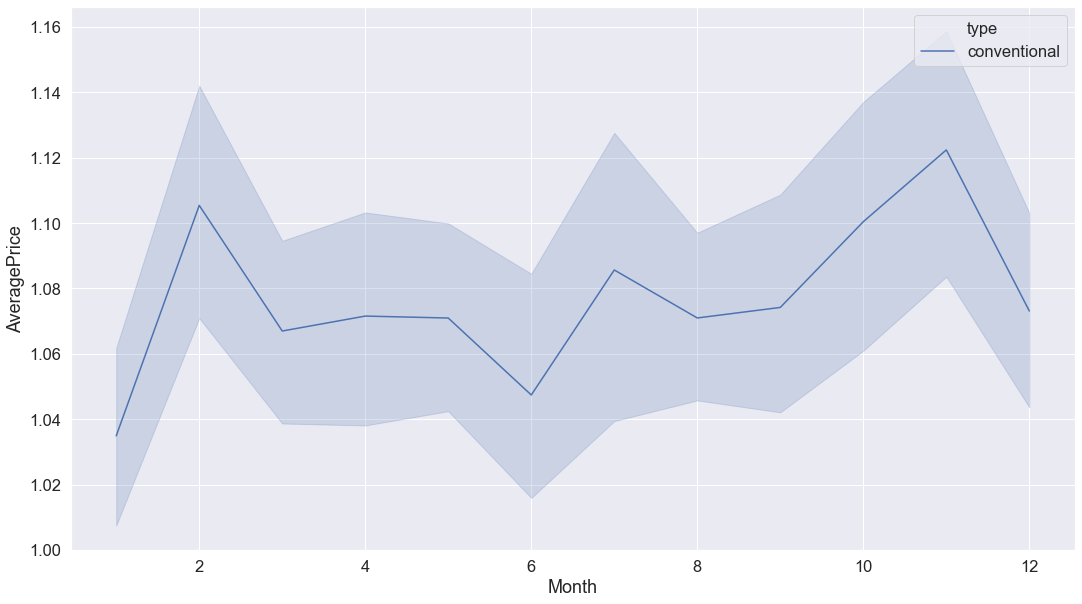

In [30]:
#Ploting lineplot to understand distribution in more efficient way
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

As per above observation we can say that the price of avocados is hike between 10- 12 month.

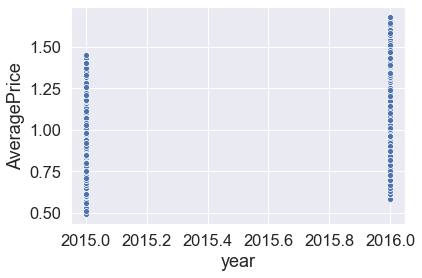

In [31]:
#Checking relation between year and average price
#Checking average price distribution along month
sns.scatterplot(x="year",y="AveragePrice",data=df)

From above observation i can say that average price is became increase from year 2015 to 2016.

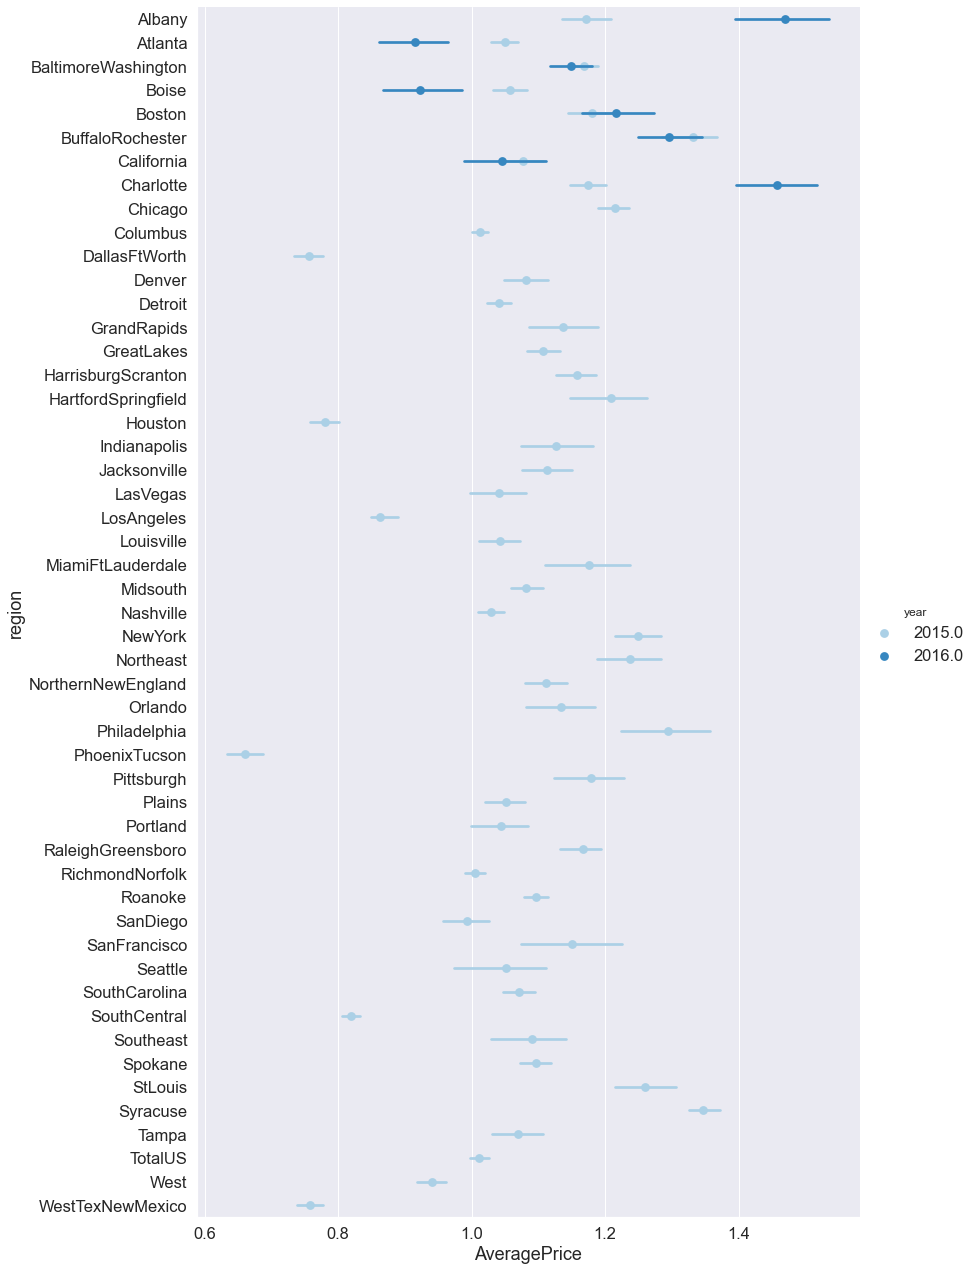

In [32]:
#Checking in which year in which reason the average price is highest
df1=pd.read_csv("avacado.csv")
g = sns.factorplot('AveragePrice','region',data=df1,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

As per above observation we can see that there is huge price increase in avacado in 2017 in Albany and Charlotte city

In [33]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'Day'],
      dtype='object')

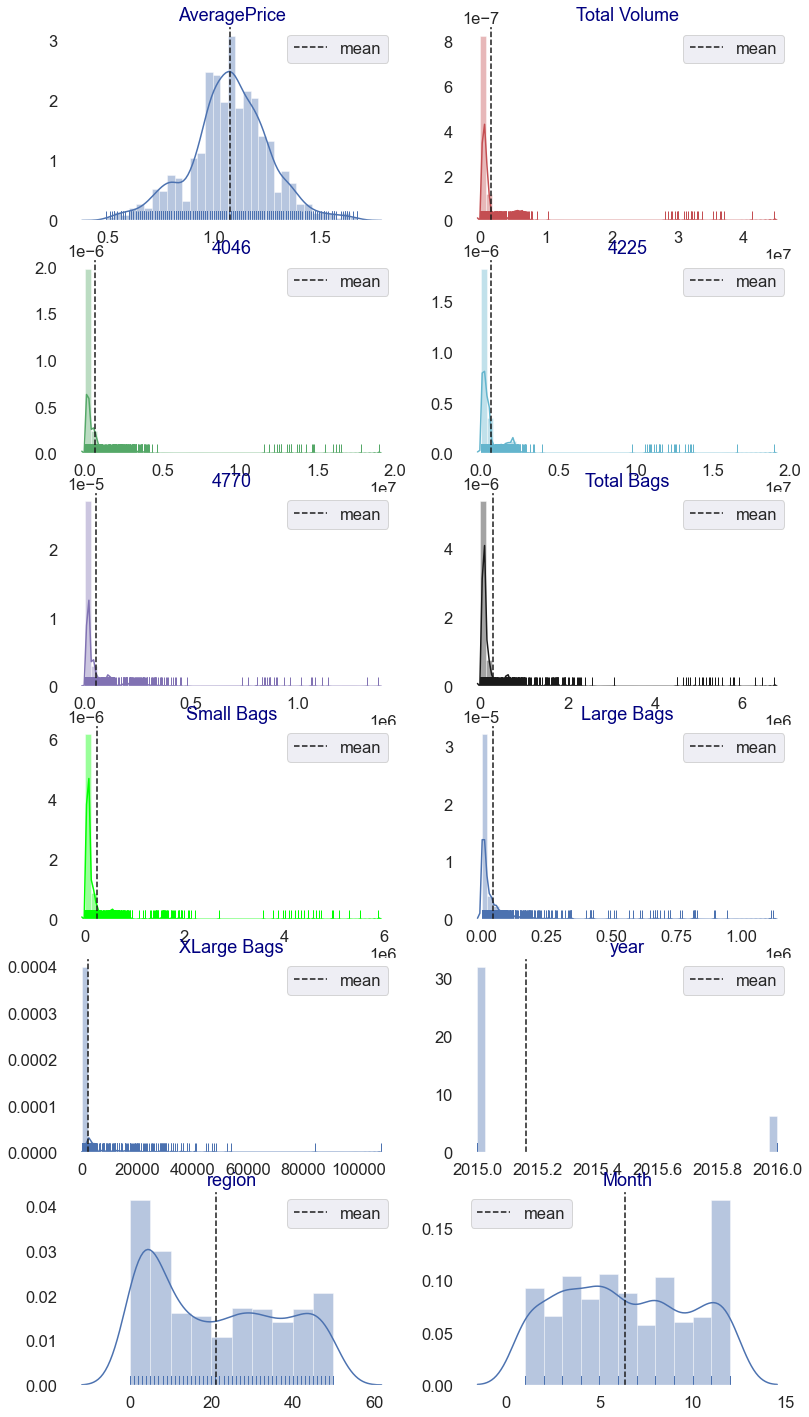

In [34]:
import warnings
warnings.filterwarnings('ignore')
import itertools

cols = [ 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'region', 'Month']
length = len(cols)

cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(6,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")


From above observation we can see that data is not normaalised accept of Item_identifier and Item_visibilty columns 
so we can proceed with data cleaning.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D56F580A00>,
      dtype=object)

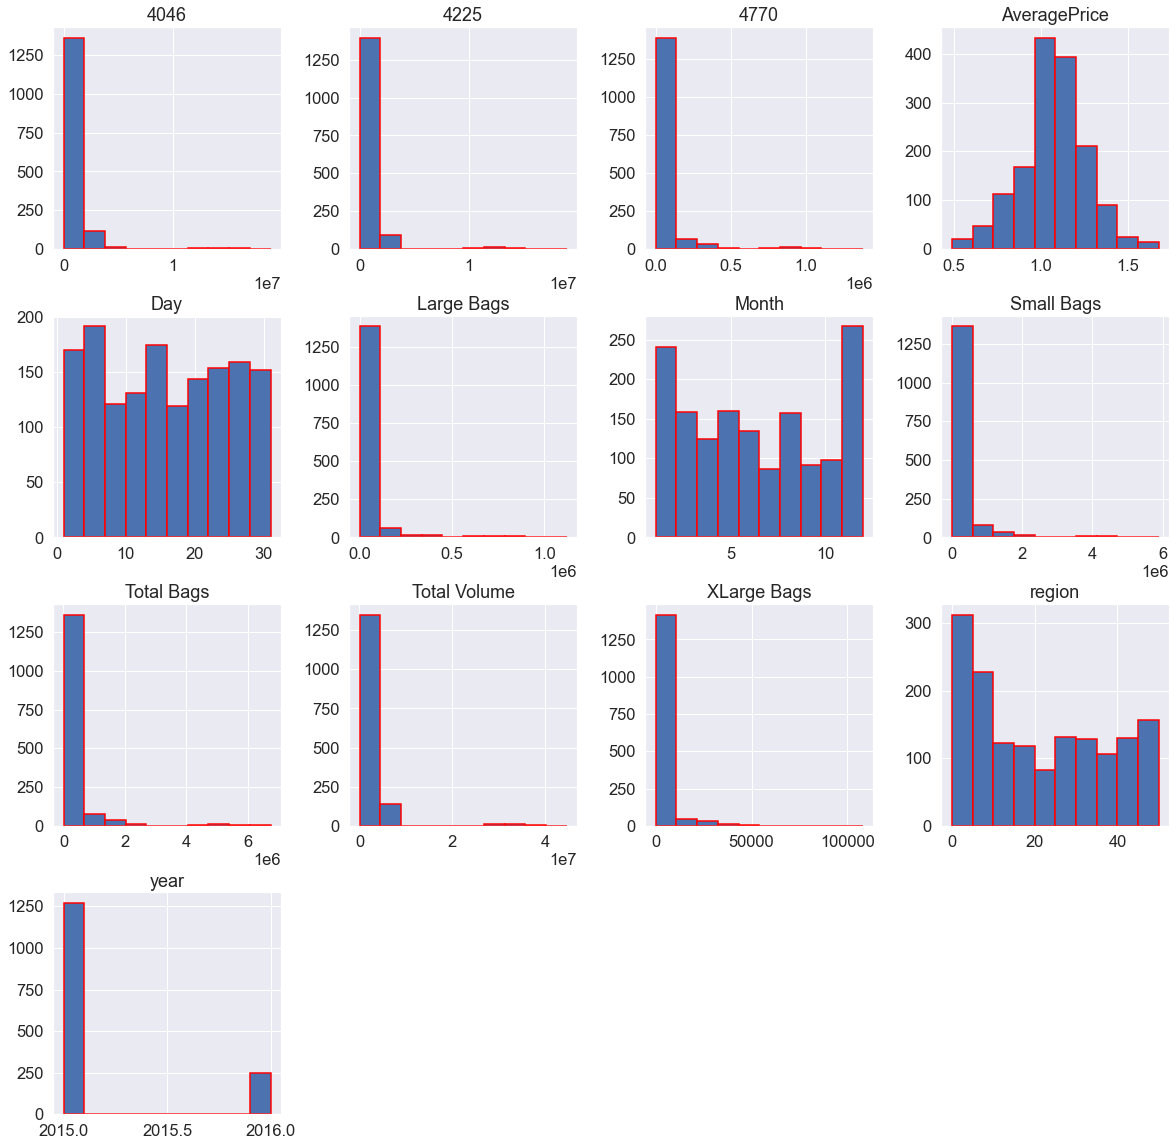

In [35]:
#Checking distribution of all columns by plotting histogram
df.hist(edgecolor="red",linewidth=1.5,figsize=(20,20))

By Ploting histogram i can confirm that there is no any column present in the dataset which is distributed normally.

In [36]:
#Dropping column which is less useful :- date and type

df.drop(['type','Date'],axis=1,inplace=True)
df.sample()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
772,0.89,726095.5,363730.26,269015.75,10663.95,82685.54,82685.54,0.0,0.0,2015,31,4,10


In [37]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
Month           0.101439
Day             0.041303
dtype: float64

<h3>
Data Transformation
</h3>

In [38]:
collist = df.columns.values
ncol=12
nrows=10

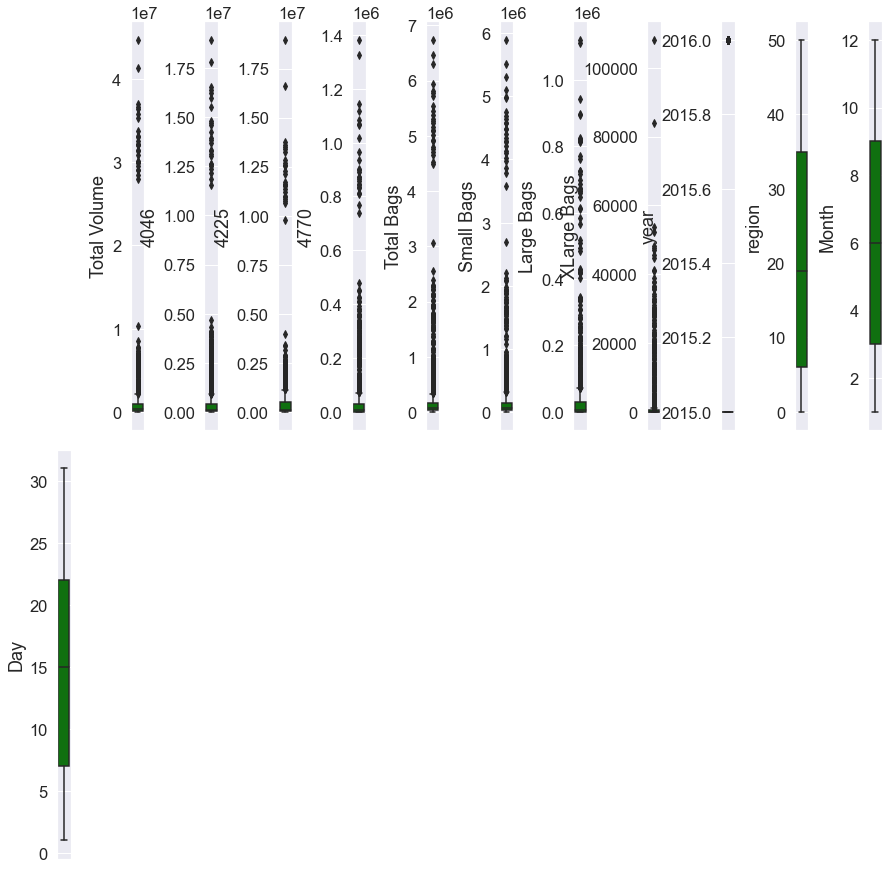

In [39]:
plt.figure(figsize = (ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color ='green',orient='v')
    plt.tight_layout()


In [40]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold =3
new_df = df[(z<3).all(axis=1)]
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7,9,25


In [41]:
df.shape

(1517, 13)

In [42]:
#Percentage Loss of data after removing outliers
percentage_loss=((1517-1436)/1517)*100
percentage_loss

5.339485827290705

In [43]:
#IQR Method

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

AveragePrice         0.21
Total Volume    834505.09
4046            357178.14
4225            443674.28
4770             28256.05
Total Bags      121402.79
Small Bags      116472.13
Large Bags       28726.93
XLarge Bags        401.48
year                 0.00
region              29.00
Month                6.00
Day                 15.00
dtype: float64


In [44]:
df_new1 = df[~((df<(Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]
print(df_new1.shape)

(881, 13)


# Preparing dataset For Model Training

In [45]:
#Seprating independent and target variable
x= new_df.drop("AveragePrice",axis=1)
y= new_df["AveragePrice"] #Target variable

In [46]:
#Linear Dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
x= pca.fit_transform(x)
x.shape

(1436, 10)

In [47]:
#Removing Skewness
from sklearn.preprocessing import power_transform
x= power_transform(x,method="yeo-johnson")

In [48]:
x.shape

(1436, 10)

In [49]:
y.shape

(1436,)

In [50]:
y = y.values.reshape(-1,1)

y.shape

(1436, 1)

<h2>
REGRESSOR MODEL BUILDING
</h2>

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_t = sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [52]:
#Finding best random state

max_scr = 0
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_t,y,random_state=i,test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random_state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-",r2_score(y_test,pred_test)*100)

At random_state  71  The model performs very well
At random_state:- 71
Training r2_score is:- 32.10356138024885
Testing r2_score is:- 32.10399063786329
At random_state  504  The model performs very well
At random_state:- 504
Training r2_score is:- 32.15814152713131
Testing r2_score is:- 32.16367691677421


In [53]:
#Finding best random state by other method
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

best_rstate=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test = train_test_split(x_t,y,test_size = .25,random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempaccu = r2_score(y_test,y_pred)
    
    if tempaccu>accu:
        accu = tempaccu
        best_rstate = i
        
        
        
print(f"Best Accuracy {accu*100} found on random_state {best_rstate}")
    



Best Accuracy 38.64274507814177 found on random_state 115


In [54]:
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(x_t,y,random_state=115,test_size=0.25)

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [56]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train_b,y_train_b)
y_pred = LR.predict(x_test_b)
r2score = r2_score(y_test_b,y_pred)
cvscore = cross_val_score(LinearRegression(),x_train_b,y_train_b,cv=5).mean()
print(f"Accuracy = {r2score*100},Cross_val_score={cvscore*100} & difference = {(r2score*100)-(cvscore*100)}")

Accuracy = 38.64274507814177,Cross_val_score=27.573872537118593 & difference = 11.068872541023179


As we see accuracy is not so good wo i will try with other models. 

# Regularization

In [57]:
#Hyperparameter Tuning by using grid search to find best parameters
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train_b,y_train_b)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [58]:
#finding at what cross validation the r2 score and cv score is good 
ls = Lasso(alpha=0.001,random_state = 0)
ls.fit(x_train_b,y_train_b)
ls.score(x_train_b,y_train_b)
pred_ls = ls.predict(x_test_b)
lss= r2_score(y_test_b,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x_t,y,cv=j)
    lsc = lsscore.mean()
    print('AT CV = ',j)
    print("cross validation score is =",lsc*100)
    print("r2_score is = ",lss*100)
    print("\n")

AT CV =  2
cross validation score is = -20.688903343240582
r2_score is =  38.25721512052341


AT CV =  3
cross validation score is = 5.605009256349439
r2_score is =  38.25721512052341


AT CV =  4
cross validation score is = 4.193905990147673
r2_score is =  38.25721512052341


AT CV =  5
cross validation score is = -20.95600667070956
r2_score is =  38.25721512052341


AT CV =  6
cross validation score is = -38.78910055228755
r2_score is =  38.25721512052341


AT CV =  7
cross validation score is = -11.664845784863456
r2_score is =  38.25721512052341


AT CV =  8
cross validation score is = -8.876738045158891
r2_score is =  38.25721512052341


AT CV =  9
cross validation score is = 2.8865004410391597
r2_score is =  38.25721512052341




In [59]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [60]:
print("Error:")

print('Mean Absolute Error:= ',mean_absolute_error(y_test_b,pred_ls))
print('Mean Squared Error:= ',mean_squared_error(y_test_b,pred_ls))
print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test_b,pred_ls)))

Error:
Mean Absolute Error:=  0.11870576609374277
Mean Squared Error:=  0.023922627435849764
Root Mean Square Error;=  0.15466941338173415


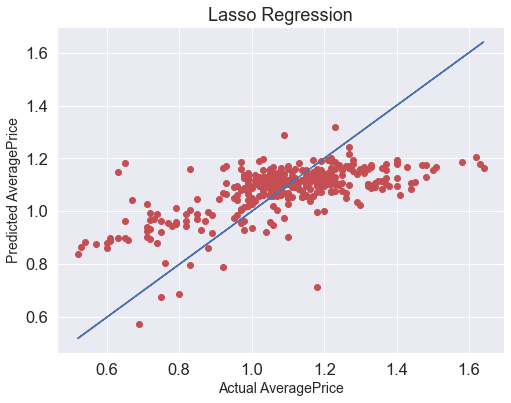

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b,y=pred_ls,color='r')
plt.plot(y_test_b,y_test_b,color='b')
plt.xlabel("Actual AveragePrice",fontsize = 14)
plt.ylabel("Predicted AveragePrice",fontsize =14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

In [62]:
#Finding Best parameters on which model learn more accurately
from sklearn.linear_model import Ridge
parameters = {'alpha':[.0001,.001,.01,.1,1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'random_state':list(range(0,10)),'tol':[.0001,.001,.01,.1,1]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train_b,y_train_b)
print(clf.best_params_)

{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.0001}


In [63]:
rd = Ridge(alpha=0.1,copy_X=True,fit_intercept=True,normalize=True,random_state = 0,tol=0.0001)
rd.fit(x_train_b,y_train_b)
rd.score(x_train_b,y_train_b)
pred_rd = rd.predict(x_test_b)
rds= r2_score(y_test_b,pred_rd)
print("R2-Score= ",rds*100)
rdscore = cross_val_score(rd,x_t,y,cv=3)
rdc=rdscore.mean()
print("Cross Val Score= ",rdc*100)

R2-Score=  36.9264111274689
Cross Val Score=  9.203740786192897


In [64]:
print("Error:")

print('Mean Absolute Error:= ',mean_absolute_error(y_test_b,pred_rd))
print('Mean Squared Error:= ',mean_squared_error(y_test_b,pred_rd))
print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test_b,pred_rd)))

Error:
Mean Absolute Error:=  0.11967094828645193
Mean Squared Error:=  0.024438255750609608
Root Mean Square Error;=  0.15632739923189923


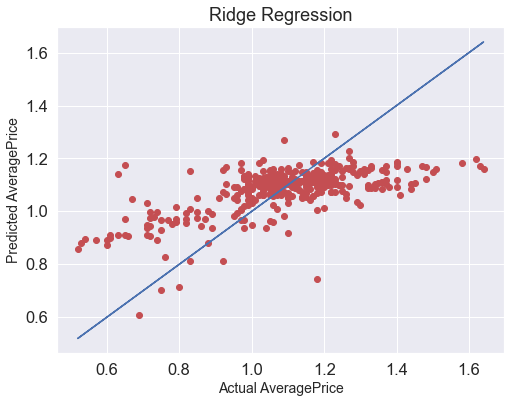

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b,y=pred_rd,color='r')
plt.plot(y_test_b,y_test_b,color='b')
plt.xlabel("Actual AveragePrice",fontsize = 14)
plt.ylabel("Predicted AveragePrice",fontsize =14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

Again in ridge regreesion we can see that the line is fit good and touches some data points but again the accuracy is not so
good. We will try other algorithms.

In [66]:
#I am using DTR and finding best parameters
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse','friedman_mse','mae'],'splitter':['best','random']}
dt = DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train_b,y_train_b)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'splitter': 'best'}


In [67]:
dt = DecisionTreeRegressor(criterion='friedman_mse',splitter='best')
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b,y_train_b)
pred_decision = dt.predict(x_test_b)
dts = r2_score(y_test_b,pred_decision)
print('R2 Score= ',dts*100)


dtscore = cross_val_score(dt,x_t,y,cv=6)
dtc = dtscore.mean()
print('cross_val_score:',dtc*100)

R2 Score=  64.06602941043359
cross_val_score: -117.51958073482012


In [68]:
print("Error:")

print('Mean Absolute Error:= ',mean_absolute_error(y_test_b,pred_decision))
print('Mean Squared Error:= ',mean_squared_error(y_test_b,pred_decision))
print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test_b,pred_decision)))

Error:
Mean Absolute Error:=  0.07935933147632311
Mean Squared Error:=  0.01392284122562674
Root Mean Square Error;=  0.1179950898369366


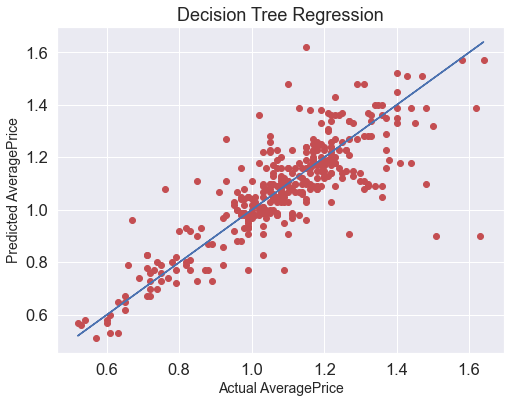

In [69]:
#Plotting graph to check best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b,y=pred_decision,color='r')
plt.plot(y_test_b,y_test_b,color='b')
plt.xlabel("Actual AveragePrice",fontsize = 14)
plt.ylabel("Predicted AveragePrice",fontsize =14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

Now from above graph we can see the this model gives the best fit line as compare to previous ones.
The line touches maximum datapoints and this is the straight line.
However i will proceed with other models.

In [70]:
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['friedman_mse','mae'],'n_estimators':[100,200,300]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train_b,y_train_b)
print(clf.best_params_)


{'criterion': 'friedman_mse', 'n_estimators': 100}


In [88]:
rf = RandomForestRegressor(criterion='friedman_mse',n_estimators=100)
rf.fit(x_train_b,y_train_b)
rf.score(x_train_b,y_train_b)
pred_random = rf.predict(x_test_b)
rfs = r2_score(y_test_b,pred_random)
print('R2 Score= ',rfs*100)


rfscore = cross_val_score(rf,x_t,y,cv=6)
rfc = rfscore.mean()
print('cross_val_score:',rfc*100)

R2 Score=  82.00923371088784
cross_val_score: -4.914223665465367


In [72]:
print("Error:")

print('Mean Absolute Error:= ',mean_absolute_error(y_test_b,pred_random))
print('Mean Squared Error:= ',mean_squared_error(y_test_b,pred_random))
print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test_b,pred_random)))

Error:
Mean Absolute Error:=  0.05712209842154141
Mean Squared Error:=  0.006932160386877143
Root Mean Square Error;=  0.0832595963650866


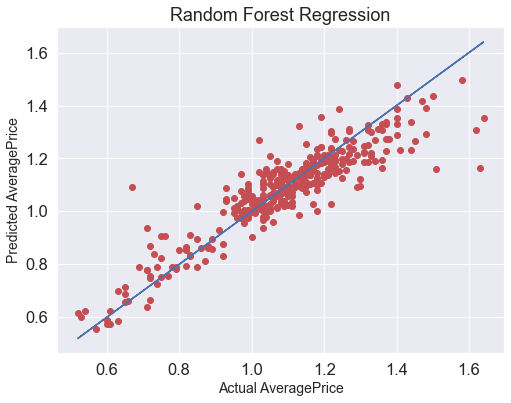

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b,y=pred_random,color='r')
plt.plot(y_test_b,y_test_b,color='b')
plt.xlabel("Actual AveragePrice",fontsize = 14)
plt.ylabel("Predicted AveragePrice",fontsize =14)
plt.title('Random Forest Regression',fontsize=18)
plt.show()

We can see the line fit and touches maxm datapoint

In [74]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor


In [75]:
parameters = {'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse','mse']}
gbr = GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train_b,y_train_b)
print(clf.best_params_)


{'criterion': 'friedman_mse', 'loss': 'ls', 'n_estimators': 200}


In [76]:
gbr = GradientBoostingRegressor(loss='ls',n_estimators=200,criterion='friedman_mse')
gbr.fit(x_train_b,y_train_b)
gbr.score(x_train_b,y_train_b)
pred_gradient = gbr.predict(x_test_b)
gbrs = r2_score(y_test_b,pred_gradient)
print('R2 Score= ',gbrs*100)


gbrscore = cross_val_score(gbr,x_t,y,cv=6)
gbrc = gbrscore.mean()
print('cross_val_score:',gbrc*100)

R2 Score=  77.42879557868892
cross_val_score: -19.243600366901457


In [77]:
print("Error:")

print('Mean Absolute Error:= ',mean_absolute_error(y_test_b,pred_gradient))
print('Mean Squared Error:= ',mean_squared_error(y_test_b,pred_gradient))
print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test_b,pred_gradient)))

Error:
Mean Absolute Error:=  0.06683417392404642
Mean Squared Error:=  0.008745354055594508
Root Mean Square Error;=  0.09351659775459385


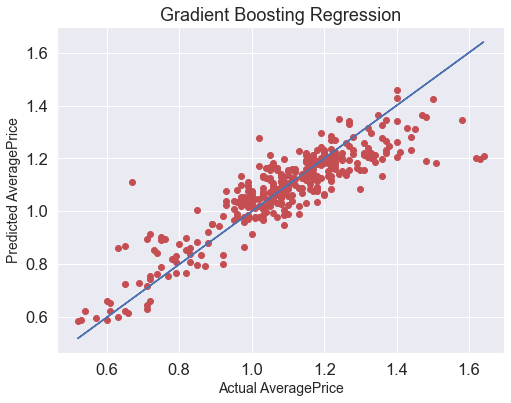

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b,y=pred_gradient,color='r')
plt.plot(y_test_b,y_test_b,color='b')
plt.xlabel("Actual AveragePrice",fontsize = 14)
plt.ylabel("Predicted AveragePrice",fontsize =14)
plt.title('Gradient Boosting Regression',fontsize=18)
plt.show()

In [79]:
from sklearn.svm import SVR

parameters= {'kernel':['Linear','poly','rbf','sigmoid'],'gamma':['auto','scale']}
sv=SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(x_train_b,y_train_b)
print(clf.best_params_)


{'gamma': 'auto', 'kernel': 'rbf'}


In [80]:
sv = SVR(kernel = 'rbf',gamma='auto')
sv.fit(x_train_b,y_train_b)
sv.score(x_train_b,y_train_b)
pred_vector = sv.predict(x_test_b)
svs = r2_score(y_test_b,pred_vector)
print('R2 Score= ',svs*100)


svscore = cross_val_score(sv,x_t,y,cv=6)
svc = svscore.mean()
print('cross_val_score:',svc*100)

R2 Score=  63.675681095541
cross_val_score: -11.877760007398368


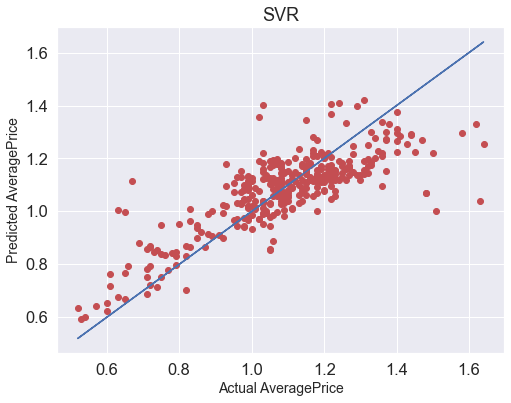

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b,y=pred_vector,color='r')
plt.plot(y_test_b,y_test_b,color='b')
plt.xlabel("Actual AveragePrice",fontsize = 14)
plt.ylabel("Predicted AveragePrice",fontsize =14)
plt.title('SVR',fontsize=18)
plt.show()

In [82]:
from sklearn.ensemble import AdaBoostRegressor
ADB = AdaBoostRegressor()
ADB.fit(x_train_b,y_train_b)
y_pred = ADB.predict(x_test_b)
r2score = r2_score(y_test_b,y_pred)
cvscore = cross_val_score(AdaBoostRegressor(),x_train_b,y_train_b,cv=6).mean()
print(f"Accuracy = {r2score*100},Cross_val_score={cvscore*100} & difference = {(r2score*100)-(cvscore*100)}")


Accuracy = 63.04399594370273,Cross_val_score=60.13754523721967 & difference = 2.9064507064830636


In [83]:
from sklearn.linear_model import SGDRegressor
SGD = SGDRegressor()
SGD.fit(x_train_b,y_train_b)
y_pred = SGD.predict(x_test_b)
r2score = r2_score(y_test_b,y_pred)
cvscore = cross_val_score(SGDRegressor(),x_train_b,y_train_b,cv=6).mean()
print(f"Accuracy = {r2score*100},Cross_val_score={cvscore*100} & difference = {(r2score*100)-(cvscore*100)}")


Accuracy = 38.59897088177697,Cross_val_score=26.42009999884052 & difference = 12.178870882936451


Conclusion:-
Afeter Observing all algorithm i found that RandomForestRegressor is performing well with best r2 score and low RMSE score.
I will choose RFR for model saving as its  R2 Score=  82.00923371088784
cross_val_score: -4.914223665465367
Mean Absolute Error:=  0.05666499535747451
Mean Squared Error:=  0.006757448659857641
Root Mean Square Error;=  0.0822037022271968


# Model Saving

In [89]:
#Model Saving with best model RandomForestRegressor
import joblib 

joblib.dump(rf,'rffile.obj')

['rffile.obj']

In [90]:
#Loading to see my model
rf_from_joblib = joblib.load('rffile.obj')
rf_from_joblib

RandomForestRegressor(criterion='friedman_mse')

In [91]:
k=rf_from_joblib.predict(x_test_b)


In [94]:
#Saving result File Into CSV FORMAT
import numpy

numpy.savetxt("Avacado_Predicted.csv", k, delimiter=",")

In [100]:
#While saving with above method the result file stored at maximum decimal places so to reduce it i am using below method
np.savetxt('Avacado1_Predicted.csv', np.around(k, decimals=2),fmt='%.2f',delimiter='\t')

# Problem Statement :- 2

<h3>
In this 2nd problem i have the target variable region and based on other features i have to classify and predict the region.
I have  other features like averageprice,type,4046,4225,4770,date and year etc to build the model to predict the rregion.
</h3>

In [102]:
#EDA is already done on this dataset so i will continue with prepare datasert model training by splitting dataset in x and y
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,11,29


In [110]:
#Checking the unique value present in the dataset and their counts
print(df['region'].unique())
print(df['region'].sort_values().value_counts(sort=True, ascending=True))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]
21     3
40     9
43     9
20    10
33    12
27    12
16    13
30    13
39    15
45    16
35    16
18    16
23    17
37    17
10    17
14    18
24    18
46    19
15    19
36    21
29    21
32    22
13    23
8     23
41    24
11    24
48    25
25    25
50    27
17    29
28    29
34    30
7     31
47    34
22    34
49    36
38    38
42    39
12    40
19    41
26    44
9     47
44    49
5     51
31    52
1     54
4     62
3     65
2     65
0     67
6     76
Name: region, dtype: int64


As per above observation we can see that there is 50 regions present in the dataset and also thier counts

In [111]:
#Now splitting the dataset in x and y to prepare the dataset for model training
#Seprating independent and target variable
x= new_df.drop("region",axis=1)
y= new_df["region"] #Target variable

In [112]:
#Linear Dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
x= pca.fit_transform(x)
x.shape

(1436, 10)

In [114]:
#Checking the shape of target variable
y.shape

(1436,)

In [115]:
#We need to reshape the target varible in 1436 rows and 1 column shape.
y = y.values.reshape(-1,1)

y.shape

(1436, 1)

In [116]:
#Scaling the dataset to minimize the distances in the dataset for better train the model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledX = sc.fit_transform(x)

In [124]:
#Importing some library for model training
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [120]:
#Finding Best Random State

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

best_rstate=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test = train_test_split(scaledX,y,test_size = .25,random_state=i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempaccu = accuracy_score(y_test,y_pred)
    
    if tempaccu>accu:
        accu = tempaccu
        best_rstate = i
        
        
        
print(f"Best Accuracy {accu*100} found on random_state {best_rstate}")
    



Best Accuracy 69.91643454038997 found on random_state 113


In [121]:
#Spliting the data into train and test for model training and testing
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size =.22,random_state =113)

In [122]:
lr = LogisticRegression()

In [123]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.5886075949367089
[[17  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  1  0 ...  3  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  2]]
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        17
           1       0.64      0.69      0.67        13
           2       1.00      0.67      0.80        15
           3       0.61      0.67      0.64        21
           4       0.65      0.92      0.76        12
           5       0.53      0.77      0.62        13
           6       0.86      0.75      0.80         8
           7       1.00      0.86      0.92         7
           8       1.00      1.00      1.00         4
           9       0.59      1.00      0.74        10
          10       1.00      0.33      0.50         3
          11       0.56      0.71      0.63         7
          12       0.82      1.00      0.90         9
          13       0.00      0.00      0.00         4
          14  

As we see logistic regression is best for bivariate model where our target varibel has two outcomes but in this scenerio
it has 50 outcomes so we will procedd with other algorithms.

In [125]:
mnb = MultinomialNB()

mnb.fit(x_train, y_train)
mnb.score(x_train,y_train)
predmnb = gnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,pred))
In the MultinomialNB i found error as i have -ve value as well in the dataset so instead of removing -ve values
it is better to try other classifiers.

In [127]:
svc = SVC()

In [128]:
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.3037974683544304
[[17  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 2  3  0 ...  0  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  2  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.12      1.00      0.22        17
           1       0.25      1.00      0.39        13
           2       0.44      0.73      0.55        15
           3       0.00      0.00      0.00        21
           4       0.38      1.00      0.55        12
           5       0.00      0.00      0.00        13
           6       1.00      0.25      0.40         8
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         7
          12       0.57      0.44      0.50         9
          13       0.00      0.00      0.00         4
          15  

In [129]:
dt = DecisionTreeClassifier()

In [130]:
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))


0.8575949367088608
[[14  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  1  0 ...  4  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  2]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        17
           1       0.92      0.85      0.88        13
           2       1.00      0.93      0.97        15
           3       1.00      0.76      0.86        21
           4       1.00      1.00      1.00        12
           5       0.92      0.92      0.92        13
           6       0.73      1.00      0.84         8
           7       0.80      0.57      0.67         7
           8       1.00      1.00      1.00         4
           9       1.00      0.90      0.95        10
          10       0.50      1.00      0.67         3
          11       0.86      0.86      0.86         7
          12       1.00      1.00      1.00         9
          13       0.67      1.00      0.80         4
          15  

In [132]:
rf = RandomForestClassifier()

In [135]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


94.9367088607595
[[17  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  3]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        12
           5       1.00      0.92      0.96        13
           6       1.00      1.00      1.00         8
           7       1.00      0.86      0.92         7
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00        10
          10       0.67      0.67      0.67         3
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         4
          15    

So After trying many algorithms i found that RandomForestClassifier the model is learning and predicted well as compare to
previous algorithms, Let draw a plot and visulize it to proper understanding.

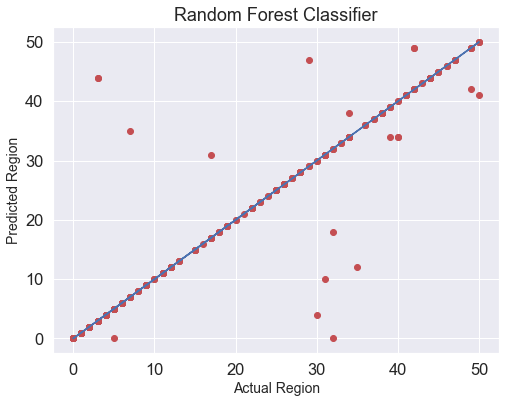

In [134]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predrf,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Region",fontsize = 14)
plt.ylabel("Predicted Region",fontsize =14)
plt.title('Random Forest Classifier',fontsize=18)
plt.show()

As per above plot we can see that the model gives the straightline which touches maxm datapoints or variable in the target 
variable. Also it shows the best fit line. So i am taking RandomForestClassifier as best model and will save this as it gives
94% accuracy.

In [136]:
 import joblib

In [137]:
joblib.dump(rf,'rffile.obj')

['rffile.obj']

In [138]:
rf_from_joblib = joblib.load('rffile.obj')

In [140]:
L=rf_from_joblib.predict(x_test)
L

array([25,  3,  0, 50,  5, 13, 32,  0, 41,  9, 49, 34, 45, 44, 47, 28,  6,
        3, 26, 38,  1, 16, 19, 45,  2, 18,  5, 31,  6, 19, 15, 25, 40,  3,
       12,  0, 35, 26,  4,  0, 33, 39,  0, 37, 23, 44, 19, 24, 26,  3,  0,
       21, 39,  4, 15, 22,  0, 36, 18,  3, 31, 41,  3, 12,  2, 38, 38, 31,
       11,  3, 11, 49,  7,  0, 32, 32, 17,  5, 26,  9,  1,  6, 38,  7, 34,
       39,  0, 44,  0, 34, 10, 29,  8,  4, 38, 43, 25,  7, 12, 29, 41, 47,
       38, 27,  1, 19, 27, 22,  3,  6, 43, 25, 34,  3,  4, 44,  0, 41, 11,
        5, 26, 49,  9,  7,  2,  3,  9,  1, 34,  9,  5, 44,  5,  3, 27, 31,
        0, 42, 11, 42,  3, 12,  8,  0, 30,  4, 28, 31, 17,  9,  6,  4, 17,
        6,  3,  0, 13, 17,  5, 32,  4, 40,  1, 17, 35, 44, 11, 11,  3, 30,
       27, 20, 50, 44, 47, 42, 26, 16, 18, 38, 31, 13,  4, 38,  4, 31, 15,
       38, 25, 41, 30,  6,  1, 34,  5,  4, 34,  2, 41, 26,  9, 39,  0,  1,
        5,  0,  2, 17, 20,  1,  3,  0, 42, 25,  2, 38,  2,  9,  3, 30,  2,
       18, 29, 34,  1,  8

In [152]:
L = L.reshape(-1,1)

In [153]:
#Saving result File Into CSV FORMAT
import numpy

numpy.savetxt("Avacado_Predicted_Region.csv", L, delimiter=",")